### ✅ 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝 전체 과정을 진행해보자

#### ✅ 1. 문제 정의
- 생존/사망을 예측
- kaggle 경진대회에서 높은 순위를 차지해보자

#### ✅ 2. 데이터 수집(불러와서 확인)

In [1]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

- ✅ 타이타닉 train 데이터와 test 데이터를 불러와서 변수에 저장(Passengerld라는 컬럼을 인덱스 자리로 옮기면서 불러오기)

In [2]:
# csv -> pd.read_csv

train = pd.read_csv('./data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 크기 확인

print('훈련 데이터 크기 : ', train.shape)
print('테스트 데이터 크기 : ', test.shape)
# 컬럼의 개수가 다르다

훈련 데이터 크기 :  (891, 11)
테스트 데이터 크기 :  (418, 10)


#### ✅ 3. 데이터 전처리 및 데이터 탐색

In [4]:
train.info()
# 결측치가 있는 컬럼 : Age, Cabin, Embarked
# 데이터 타입 : 숫자(정수, 실수), 문자
# 모델링을 할 때 모델은 숫자데이터만 인식
# 문자 -> 숫자 : 인코딩(원핫인코딩, 라벨인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test.info()
# Survived 컬럼이 없다! -> 우리가 맞춰야하는 답 데이터
# y_test는 어디있을까? --> kaggle이 알고 있다
# 결측치가 있는 컬럼 : Age, Fare, Cabin
# 데이터 타입 : 숫자(정수, 실수), 문자열

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
# 컬럼 정보 정리

train.columns
# 'Survived' : 생존/사망 결과값이 담긴 컬럼 (정답 데이터) -> 0 : 사망, 1 : 생존
# 'Pclass' : 승객 등급(1:상위층, 2:중상위층, 3:하위층)
# 'Name'
# 'Sex'
# 'SibSp' : 형제, 자매, 배우자의 수 (같이 탑승한)
# 'Parch' : 부모/자식의 수 (같이 탑승한)
# 'Ticket' : 티켓 번호
# 'Fare' : 요금
# 'Cabin' : 객실 번호
# 'Embarked' : 승선항(S, C, Q)
# S = Southampton, C = Cherbourg, Q = Queenstown

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- ✅ train : Embarked 컬럼 결측치 채우기

In [8]:
# 데이터 확인 -> train 기준으로 확인
# 좋은 모델을 만드려면 학습 데이터를 잘 구비해야 한다.
# train에서 Embarked 컬럼 인덱싱 -> S, C, Q가 몇 개씩 있는지 확인

# 결측치 채우는 방법
# 1. 제거(제거해도 데이터에 영향이 미미)
# 2. 임의의 값으로 채워넣기(중앙값, 평균값, 최빈값)

train['Embarked'].value_counts() # S에서 제일 많이 탔다

# 결측치 몇개?
train['Embarked'].isnull().sum()

# train['Embarked'] 결측치가 있는 데이터 출력하기
train['Embarked'].isnull() # 불리언 인덱싱의 재료!!

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Embarked, Length: 891, dtype: bool

In [9]:
# 두 사람의 데이터가 서로 비슷
# -> 같은 승선항에서 탔을 것이라고 가정
# 사람이 가장 많이 탑승한 장소의 승선항 값으로 채워보기

# 1. 인덱싱을 하나씩 해서 접근 -> 값을 수정
# 2. NaN 값(비어있는 값)을 모두 찾아서 대체해주는 함수를 사용 : fillna(값)

# 결측치가 있는 자리에 값을 초기화해서 대입

train['Embarked'] = train['Embarked'].fillna('S')

In [10]:
train['Embarked'].isnull().sum() # -> NaN 값이 채워졌구나!!

0

- ✅ test 데이터에 있는 Fare 컬럼 결측치 채우기

In [11]:
# test 데이터에서 Fare 컬럼 인덱싱한 후 결측치가 존재하는 행 출력하기

test[test['Fare'].isnull()] # 3
# pclass 혹은 성별 혹은 도시와 연관이 되지 않았을까?
# 상관관계 확인

train.corr(numeric_only=True) # 문자열로 된 컬럼 포함 -> 상관계수 X

# Fare 컬럼과 연관이 있는 컬럼은 무엇일까? -> Pclass
# -1 ~ +1 표현되는 계수
# -1과 +1에 가까울수록 속성간에 관계가 깊다
# 0에 가까울수록 상대적으로 관계가 깊지 않다(적음)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# train 데이터의 Fare 컬럼 기술 통계량 확인
# describe()
# 중앙값, 평균값 중에 대표값으로 설정할 값을 찾기 위해

train['Fare'].describe() # 평균값이 아닌 중앙값을 가지고 대표값으로 선택

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [14]:
# Pclass, Sex -> Fare 중앙, 평균 값으로 결측치를 대체해보자
# 1. female -> Fare 중앙 값, 평균 값을 확인하고 해당 값으로 채워보자
# 2. male -> Fare 값 채워보자
# 3. test['Fare'] 3등급, 남성 승객의 중앙값
# train 데이터를 기준으로 승객 등급, 성별 그룹핑(groupby)
# 중앙값 median()

train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()
# median()이 없으면 수치값이 보이지 않음!
# -> 어떤 값을 구할지 안알려줬기 때문!

# test['Fare'] 결측치를 채워주자 -> 7.925

test['Fare'] = test['Fare'].fillna(7.925)

test['Fare'].isnull().sum() # 처리 확인

0

- ✅ Age 결측치 채우기
    - train, test 모두 처리
    - 나이의 평균, 중앙값으로 결측치를 채워보자
    - 다른 컬럼과의 상관관계를 이용하여 결측치 채워보기

In [15]:
# 기술 통계량
# 중앙값 vs 평균값? -> 평균값(mean)

train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# Age 컬럼과 상관관계가 높은 컬럼 찾아보기! -> Pclass
# 데이터프레임은 시리즈를 모은 것

train.corr(numeric_only=True)['Age'].abs().sort_values(ascending=False) # 시리즈 데이터구조
# ascending = False : 큰 값

Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Fare        0.096067
Survived    0.077221
Name: Age, dtype: float64

In [17]:
# Pclass, Sex, Age 컬럼의 평균값 출력해보기
# femail, age 평균
# male, age 평균

gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

# -> 나이가 많을수록 높은 클래스를 탄다
# -> 남자가 여자보다 나이가 많다

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [18]:
# gb1 3등급, male 나이 평균값 접근해보기
# 멀티인덱스 접근 방법

gb1.loc[(3, 'male')] # gb1.loc[3,'male']

# 1등급 여성 나이 평균 출력해보기

gb1.loc[(1, 'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [19]:
train[train['Age'].isnull()]

# ⭐⭐⭐ 어려움 ⭐⭐⭐
# 결측치를 채우기 위해서 각 승객의 등급, 성별을 확인한 후
# Age 평균 값을 인덱싱하여 채움

def pre_age(row) :
    
    # 만약 나이가 결측치라면, 값을 가져오고 row에는 한 사람의 정보가 담긴다.
    if np.isnan(row['Age']) : # 결측치를 확인하는 함수 == np.isnan(대상)
        return gb1.loc[(row['Pclass'], row['Sex'])]
    
    # 만약 나이가 결측치가 아니라면 원래 나이값을 그대로 사용
    else :
        return row['Age']
    
train['Age'] = train.apply(pre_age, axis=1)
train['Age'].isnull().sum()

0

In [20]:
# test 데이터의 Age 컬럼 결측치도 처리

test['Age'] = test.apply(pre_age, axis=1)
test['Age'].isnull().sum()

0

In [21]:
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')
test['Age'].dtype

C:\Users\smhrd\AppData\Local\Temp\ipykernel_11828\2688540183.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train['Age'].astype('int64')
C:\Users\smhrd\AppData\Local\Temp\ipykernel_11828\2688540183.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test['Age'].astype('int64')


dtype('int64')

- ✅ train, test : Cabin(객실번호) 채우기

In [22]:
# train['Cabin'] 결측치는 몇 개 있을까?

train['Cabin'].isnull().sum() # 결측치가 너무 많음!

687

In [23]:
train.info() # 891개 중에 687개 -> 절반 이상이 결측치!

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [24]:
# 중복 없이 값 확인
# unique()

train.columns # 층을 나눈 것 -> Cabin, Pclass

train['Cabin'].unique()
# 생김새 : 층 + 방 번호(C 층 2번)

# 결측치를 임의로 'M' 값으로 채워보기
# filna()로 결측치를 처리한 후 Deck 컬럼을 생성해서 담기

train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [25]:
# Deck 컬럼에서 맨 첫글자 알파벳만 추출하기

train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [26]:
# Cabin 컬럼 삭제
# drop()

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### ✅ 데이터 탐색

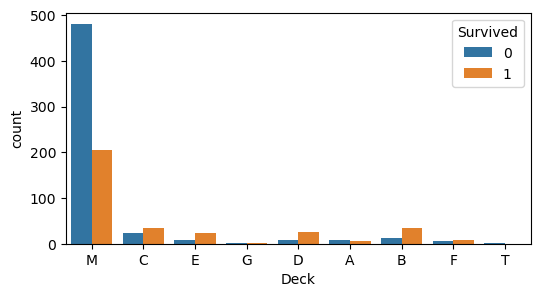

In [29]:
# Deck 컬럼과 Survived 컬럼의 연관성 확인
# 막대 그래프 활용

plt.figure(figsize=(6,3))

sns.countplot(data = train, x = 'Deck', hue = 'Survived')

plt.show()
# 1 -> 생존
# A -> 높은 층

In [30]:
# M에서 상대적으로 많은 사람들이 사망했다
# Survived에 영향을 주지는 않을까?

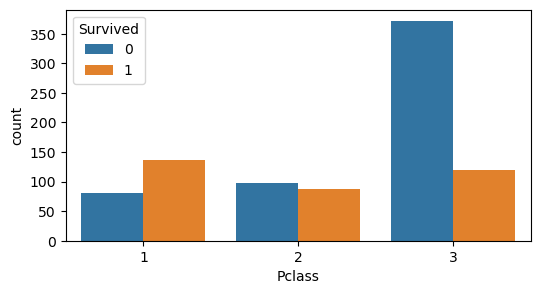

In [31]:
# Pclass와 Survived 시각화
# countplot
# 생존/사망 의미 파악해보기

plt.figure(figsize=(6,3))

sns.countplot(data=train, x='Pclass', hue='Survived')

plt.show()

In [32]:
# 1등급 - 비교적 생존율 높음
# 2등급 - 사망율이 생존율보다 조금 높다
# 3등급 - 사망율이 월등히 높다

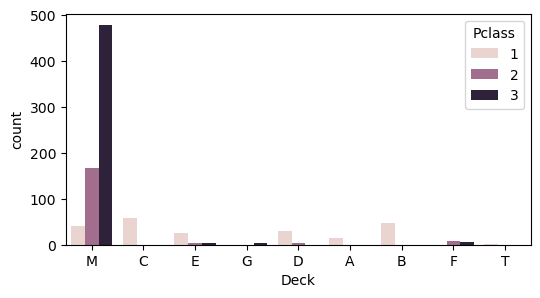

In [52]:
# Deck와 Pclass를 연관지어서 시각화
# X = Deck
# hue = Pclass

plt.figure(figsize=(6,3))

sns.countplot(data=train, x='Deck', hue='Pclass')

plt.show()

In [34]:
# M에서 사망율이 높았던 건 3등급의 사람이 많아서였음
# Deck라는 컬럼이 생존/사망에 크게 영향을 주고 있는 것은 아니다
# 오히려 Pclass는 영향을 크게 미치고 있다

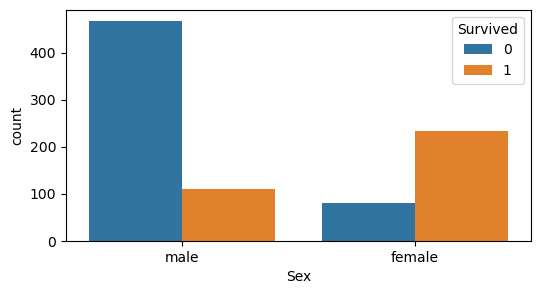

In [35]:
# Sex와 Survived의 시각화

plt.figure(figsize=(6,3))

sns.countplot(data=train, x='Sex', hue='Survived')

plt.show() # 레이디 펄스트라 여성이 살 확률이 더 높았음

In [36]:
# 남성은 상대적으로 사망율이 높음
# 여성은 상대적으로 생존율이 높음
# 생존/사망을 판별하는데 성별은 도움이 되겠다

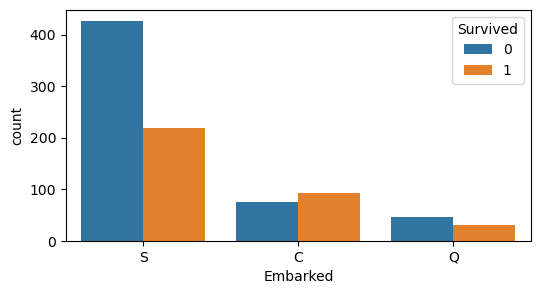

In [37]:
# Embarked와 Survived의 관계 시각화

plt.figure(figsize=(6,3))

sns.countplot(data=train, x='Embarked', hue='Survived')

plt.show()

In [38]:
# 승선항이 생존과 사망에 영향을 미쳤는지 아닌지 확고한 증거가 없다.